In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from filters import Kalman, Kalman_Ensemble, Naive, Bootstrap_PT
from process import gen_process

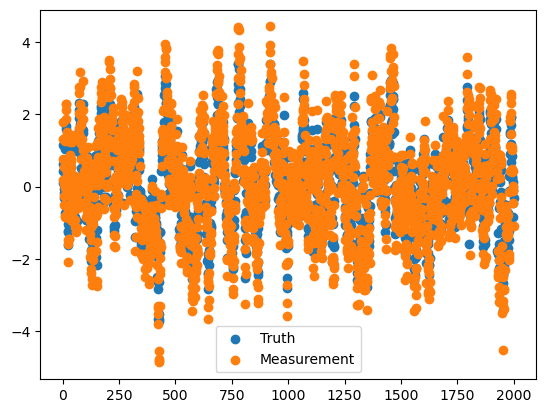

In [2]:
iters, u, y = gen_process()


plt.scatter(iters, u, label = "Truth")
plt.scatter(iters, y, label = "Measurement")
plt.legend()

RMSE Naive: 0.2763
RMSE Kalman: 0.2720


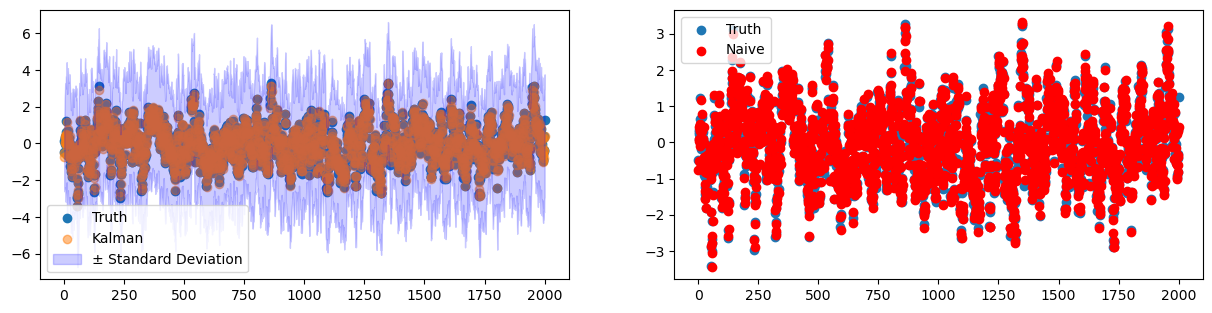

In [5]:
iters, u, y = gen_process()

Kalman_filter = Kalman()
naive_predictor = Naive()

for i in range(0,len(iters)):

    Kalman_filter.iterate(y[i], u[i])
    naive_predictor.iterate(y[i], u[i])

print(f"RMSE Naive: {naive_predictor.RMSE():.4f}")
print(f"RMSE Kalman: {Kalman_filter.RMSE():.4f}")

fig, axes = plt.subplots(1,2, figsize = (15,3.5))

axes[0].scatter(iters, u, label = "Truth")
axes[1].scatter(iters, u, label = "Truth")

axes[0].scatter(iters, Kalman_filter.u_est_hist, label = "Kalman", alpha = 0.5)

axes[0].fill_between(
    iters,
    np.array(Kalman_filter.u_est_hist).flatten() - np.array(Kalman_filter.var_hist).flatten(),  # Lower bound
    np.array(Kalman_filter.u_est_hist).flatten() + np.array(Kalman_filter.var_hist).flatten(),  # Upper bound
    color="blue",
    alpha=0.2,       # Transparency of the shaded area
    label="± Standard Deviation"
)
axes[1].scatter(iters, naive_predictor.u_est_hist, label = "Naive", color = 'red')

axes[0].legend()
axes[1].legend()

RMSE Kalman Ensemble: 0.3134
RMSE Bootstrap: 0.2832


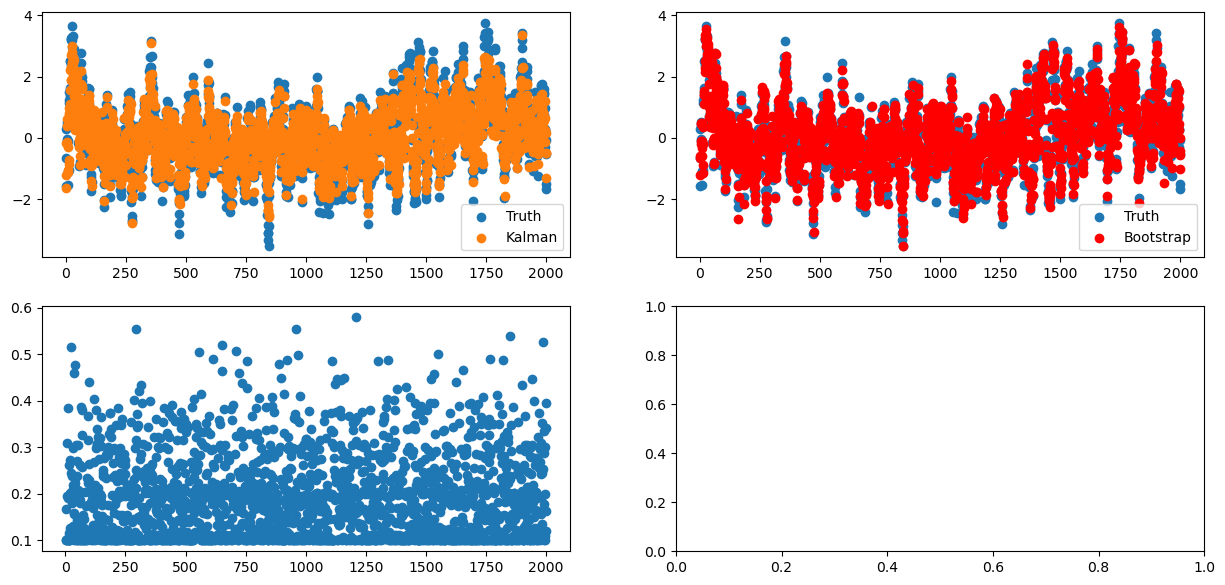

In [ ]:
iters, u, y = gen_process(2000)

bootstrap = Bootstrap_PT(n = 10)
Kalman_ensemble_filter = Kalman_Ensemble(10)


for i in range(len(iters)):

    Kalman_ensemble_filter.iterate(y[i], u[i])
    bootstrap.iterate(y[i], u[i])


print(f"RMSE Kalman Ensemble: {Kalman_ensemble_filter.RMSE():.4f}")
print(f"RMSE Bootstrap: {bootstrap.RMSE():.4f}")

fig, axes = plt.subplots(2,2, figsize = (15,7))

axes[0][0].scatter(iters, u, label = "Truth")
axes[0][1].scatter(iters, u, label = "Truth")

axes[0][0].scatter(iters, Kalman_ensemble_filter.u_est_hist, label = "Kalman")
axes[0][1].scatter(iters, bootstrap.u_est_hist, label = "Bootstrap", color = 'red')

axes[0][0].legend()
axes[0][1].legend()

axes[1][0].scatter(iters[1:], bootstrap.ESS_hist)